In [2]:
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.stats import kurtosis, skew

from rcv_distribution import *

c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
def analyze_peaks(data):
    # Find peaks
    peaks, _ = find_peaks(data)
    peak_heights = data[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    # Calculate significance (difference from the mean of other peaks)
    other_heights = np.delete(peak_heights, top_peaks)
    mean_other_heights = np.mean(other_heights)
    std_other_heights = np.std(other_heights)
    
    significance1 = (height1 - mean_other_heights) / std_other_heights
    significance2 = (height2 - mean_other_heights) / std_other_heights
    
    # Calculate closeness (absolute difference in heights)
    closeness = abs(height1 - height2)
    
    # Calculate distance on the x-axis
    distance_on_x_axis = abs(peak1 - peak2)
    
    return {
        "significance_of_peak1": significance1,
        "significance_of_peak2": significance2,
        "closeness_of_peaks": closeness,
        "distance_on_x_axis": distance_on_x_axis
    }

In [4]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [5]:
def analyze_kde_peaks(data, bandwidth=0.1):
    
    data = normalize_data(data)
    
    # Calculate KDE
    kde = gaussian_kde(data, bw_method=bandwidth)
    x = np.linspace(np.min(data), np.max(data), 1000)
    kde_values = kde(x)

    # Find peaks in the KDE
    peaks, _ = find_peaks(kde_values)
    peak_heights = kde_values[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    # Calculate significance (difference from the mean of other peaks)
    other_heights = np.delete(peak_heights, top_peaks)
    mean_other_heights = np.mean(other_heights)
    std_other_heights = np.std(other_heights)
    
    significance1 = (height1 - mean_other_heights) / std_other_heights
    significance2 = (height2 - mean_other_heights) / std_other_heights
    
    # Calculate closeness (absolute difference in heights)
    closeness = abs(height1 - height2)
    
    # Calculate distance on the x-axis
    distance_on_x_axis = abs(x[peak1] - x[peak2])

    bimodality = (significance1 * significance2) / (closeness * (abs(significance1 - significance2)))
    
    return {
        "significance_of_peak1": significance1,
        "significance_of_peak2": significance2,
        "closeness_of_peaks": closeness,
        "distance_on_x_axis": distance_on_x_axis,
        "Bimodality" : bimodality
    }


Significance of peak 1: 0.9887866689297592
Significance of peak 2: 0.9887866689297592
Closeness of peaks: 0.0
Distance on x axis: 140057


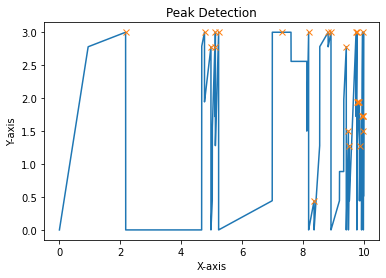

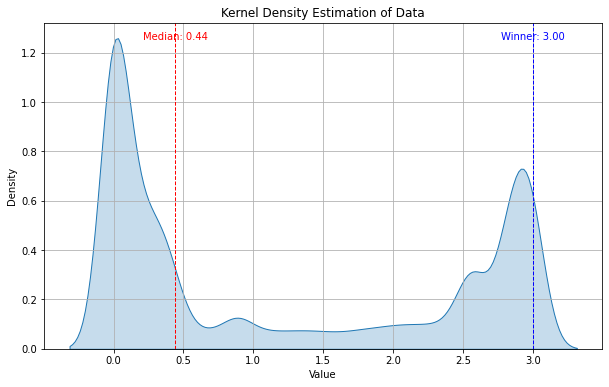

In [3]:
# Example usage 
filename = "Alaska_11082022_GovernorLieutenantGovernor"
data = np.load("np_data/" + filename + ".npy")

result = analyze_peaks(data)
print("Significance of peak 1:", result["significance_of_peak1"])
print("Significance of peak 2:", result["significance_of_peak2"])
print("Closeness of peaks:", result["closeness_of_peaks"])
print("Distance on x axis:", result["distance_on_x_axis"])

# Plotting
x = np.linspace(0, 10, len(data))
peaks, _ = find_peaks(data)
plt.plot(x, data)
plt.plot(x[peaks], data[peaks], "x")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Peak Detection')
plt.show()

plot_median_and_winner(filename)

Significance of peak 1: 2.1802787232802774
Significance of peak 2: 2.133827370513045
Closeness of peaks: 0.024049785107006727
Distance on x axis: 0.1301301301301302
Bimodality 4164.489120575616


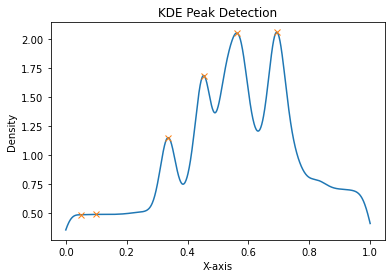

Skewness:  -0.3050790327462332
Kurtosis:  -0.4383159672912238
Bimodality II:  -2.4938019551889212


In [6]:
filename = "Minneapolis_11072017_Mayor"
data = np.load("np_data/" + filename + ".npy")

result = analyze_kde_peaks(data)
print("Significance of peak 1:", result["significance_of_peak1"])
print("Significance of peak 2:", result["significance_of_peak2"])
print("Closeness of peaks:", result["closeness_of_peaks"])
print("Distance on x axis:", result["distance_on_x_axis"])
print("Bimodality", result["Bimodality"])

# Plotting
data = normalize_data(data)
kde = gaussian_kde(data)
x = np.linspace(np.min(data), np.max(data), 1000)
kde_values = kde(x)
peaks, _ = find_peaks(kde_values)

plt.plot(x, kde_values)
plt.plot(x[peaks], kde_values[peaks], "x")
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.title('KDE Peak Detection')
plt.show()





In [7]:
def analyze_kde_peaks_normalized_heights(data, bandwidth=0.1):
    # Normalize the data
    data = normalize_data(data)

    # Calculate KDE
    kde = gaussian_kde(data, bw_method=bandwidth)
    x = np.linspace(np.min(data), np.max(data), 1000)
    kde_values = kde(x)

    # Normalize KDE values
    kde_values = normalize_data(kde_values)

    # Find peaks in the KDE
    peaks, _ = find_peaks(kde_values)
    peak_heights = kde_values[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
    print(peak_heights)
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    # Calculate significance (difference from the mean of other peaks)
    other_heights = np.delete(peak_heights, top_peaks)
    mean_other_heights = np.mean(other_heights)
    std_other_heights = np.std(other_heights)
    
    significance1 = (height1 - mean_other_heights) / std_other_heights
    significance2 = (height2 - mean_other_heights) / std_other_heights
    
    # Calculate closeness (absolute difference in heights)
    closeness = abs(height1 - height2)
    
    # Calculate distance on the x-axis
    distance_on_x_axis = abs(x[peak1] - x[peak2])


    x_between_peaks = x[min(peak1, peak2):max(peak1, peak2)+1]
    kde_values_between_peaks = kde_values[min(peak1, peak2):max(peak1, peak2)+1]
    area_between_peaks = simps(kde_values_between_peaks, x_between_peaks)
    
    bimodality = (significance1 * significance2) / ((1 + closeness) * (1 + (abs(significance1 - significance2))))
    
    return {
        "significance_of_peak1": significance1,
        "significance_of_peak2": significance2,
        "closeness_of_peaks": closeness,
        "distance_on_x_axis": distance_on_x_axis,
        "Bimodality" : bimodality
    }

[0.19207378 0.11308123 0.10770574 1.         0.12857182 0.06376779]
Significance of peak 1: 37.26198030170334
Significance of peak 2: 3.689643204105968
Closeness of peaks: 0.8079262196080818
Distance on x axis: 0.6206206206206206
Bimodality 2.1995855644895865


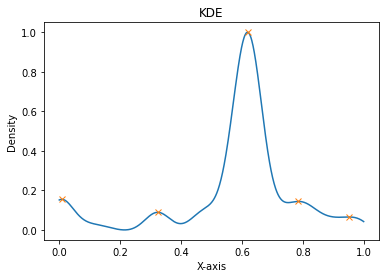

Skewness:  -0.828114290972986
Kurtosis:  3.29082275584932
Bimodality II:  0.5122649878111148
Bimodality III:  0.267924135427312


In [32]:
filename = "NewYorkCity_06222021_DEMCouncilMember37thCouncilDistrict"
data = np.load("np_data/" + filename + ".npy")

result = analyze_kde_peaks_normalized_heights(data)
print("Significance of peak 1:", result["significance_of_peak1"])
print("Significance of peak 2:", result["significance_of_peak2"])
print("Closeness of peaks:", result["closeness_of_peaks"])
print("Distance on x axis:", result["distance_on_x_axis"])
print("Bimodality", result["Bimodality"])

# Plotting
data = normalize_data(data)
kde = gaussian_kde(data)
x = np.linspace(np.min(data), np.max(data), 1000)
kde_values = kde(x)
kde_values = normalize_data(kde_values)
peaks, _ = find_peaks(kde_values)

plt.plot(x, kde_values)
plt.plot(x[peaks], kde_values[peaks], "x")
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.title('KDE')
plt.show()

s = skew(data)
k = kurtosis(data, fisher=False)
print("Skewness: ", s)
print("Kurtosis: ", k)
print("Bimodality II: ", ((s ** 2) + 1)/k)

n = len(data)
bimodality3 = (s**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))

print("Bimodality III: ", bimodality3)


c:\Users\mahsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
